# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 05 : HeartDisease_Classification

### Dataset Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [55]:
#@title Download dataset
!gdown "1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7"

Downloading...
From: https://drive.google.com/uc?id=1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7
To: c:\Users\DELL\OneDrive\Desktop\IIT Madras Project\Project5\heart.csv

  0%|          | 0.00/38.1k [00:00<?, ?B/s]
100%|██████████| 38.1k/38.1k [00:00<00:00, 1.48MB/s]


### Import Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [57]:
import pandas as pd

# Load the data from heart.csv
df = pd.read_csv('heart.csv')

In [58]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Exploration (2 Marks)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8868\3815516878.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


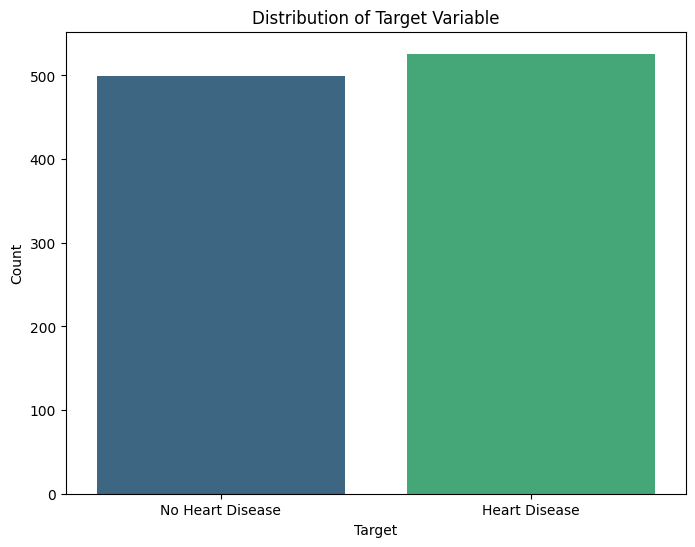

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a countplot for the 'target' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

Analyze and report the percentage of patients with and without heart disease based on a given dataset. Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.

In [61]:
# Calculate the counts of each category in the 'target' variable
target_counts = df['target'].value_counts()

# Calculate the percentages
percentage_no_disease = (target_counts[0] / target_counts.sum()) * 100
percentage_with_disease = (target_counts[1] / target_counts.sum()) * 100

# Print the results
print(f"Percentage of patients without heart disease: {percentage_no_disease:.2f}%")
print(f"Percentage of patients with heart disease: {percentage_with_disease:.2f}%")

Percentage of patients without heart disease: 48.68%
Percentage of patients with heart disease: 51.32%


Count the percentage of Male and Female patients

In [62]:
# Calculate the counts of each gender in the 'sex' variable
gender_counts = df['sex'].value_counts()

# Calculate the percentages
percentage_male = (gender_counts[1] / gender_counts.sum()) * 100
percentage_female = (gender_counts[0] / gender_counts.sum()) * 100

# Print the results
print(f"Percentage of Male patients: {percentage_male:.2f}%")
print(f"Percentage of Female patients: {percentage_female:.2f}%")

Percentage of Male patients: 69.56%
Percentage of Female patients: 30.44%


In [63]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


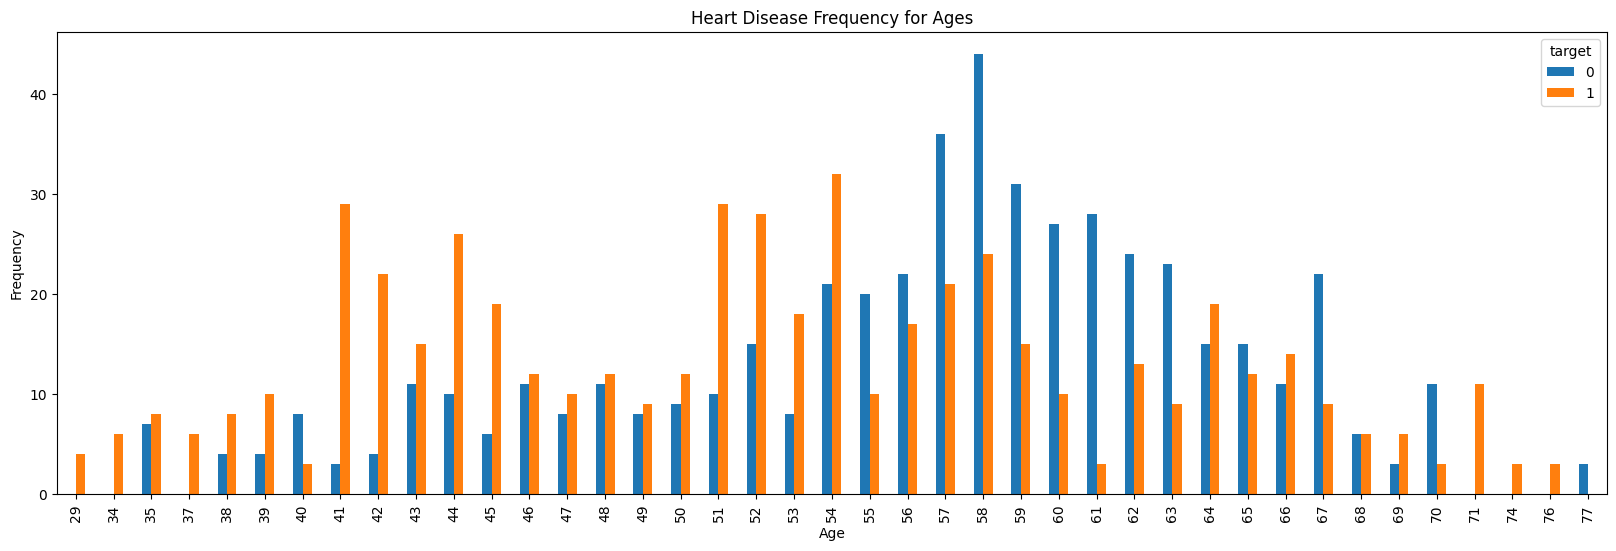

In [64]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

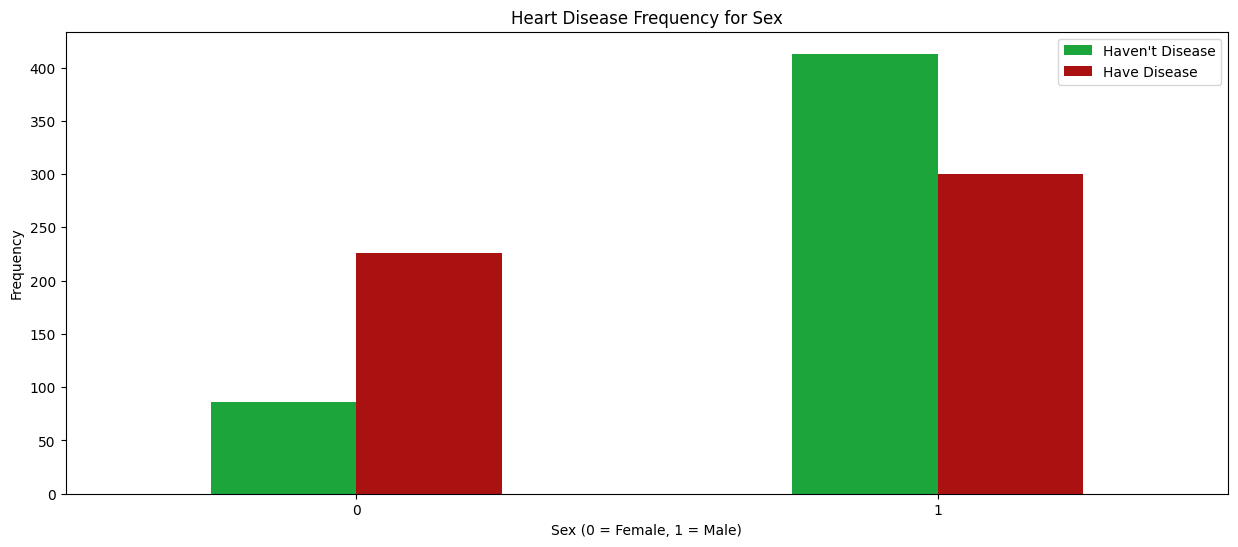

In [65]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

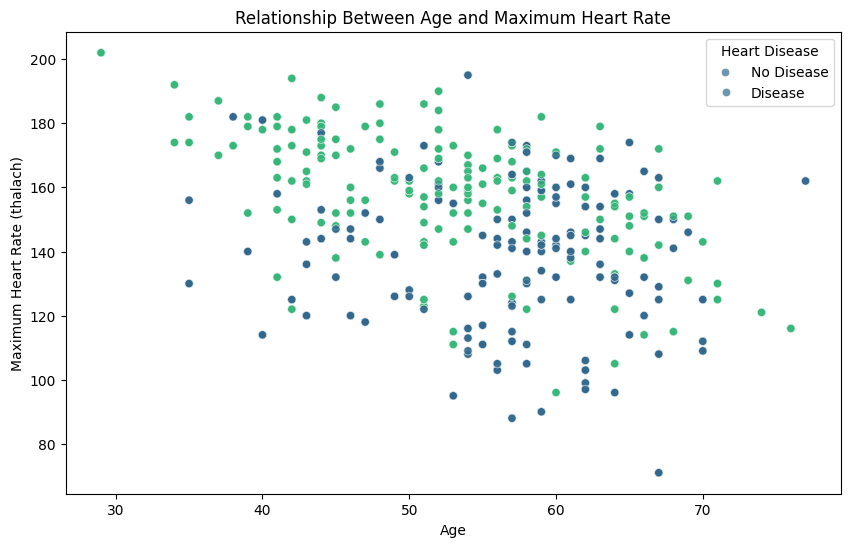

In [66]:
# Create a scatter plot for age vs. maximum heart rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target', palette='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Relationship Between Age and Maximum Heart Rate')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

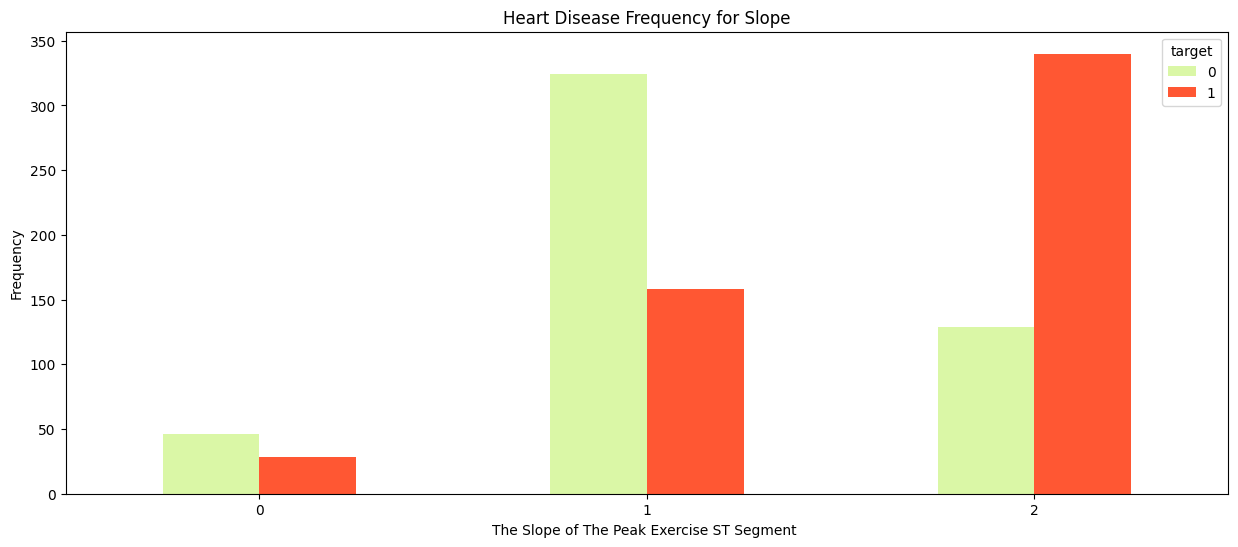

In [67]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

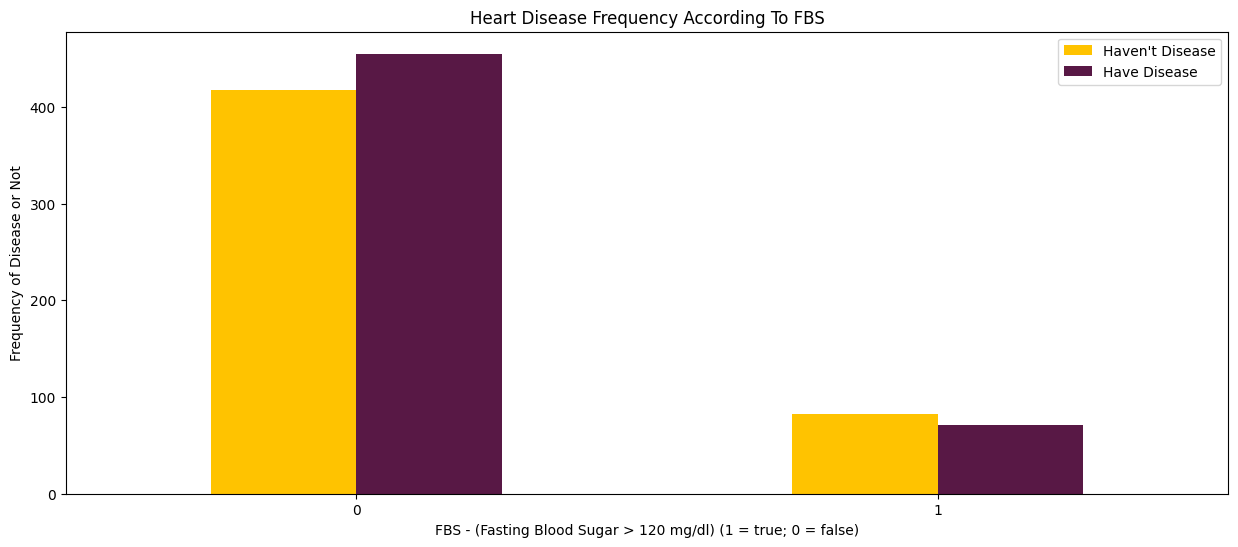

In [68]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

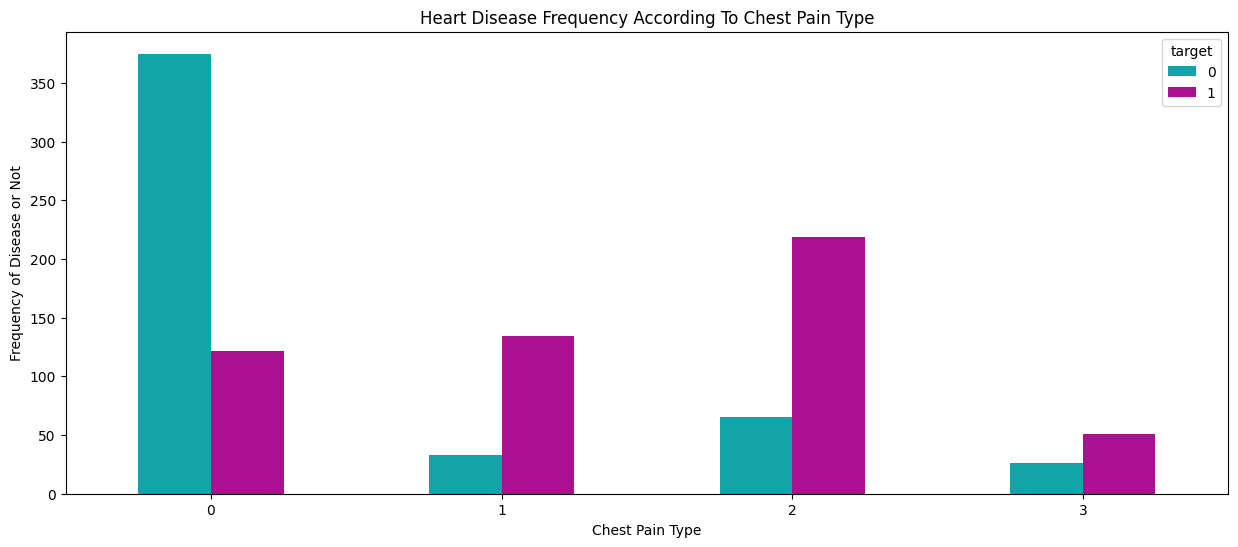

In [69]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [70]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [71]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [72]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


### Creating Model


In [73]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data ( 1 Mark)

In [74]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Select the columns to normalize (excluding the target variable)
columns_to_normalize = df.columns.difference(['target'])  # Adjust if 'target' has a different name

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [75]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.479167,1.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.500000,1.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.854167,1.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.666667,1.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.687500,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume 'target' is the column we want to predict
X = df.drop('target', axis=1)  # Features
y = df['target']                # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 820
Testing set size: 205


### Logistic Regression (1 Mark)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


### K-Nearest Neighbour (KNN) Classification ( 1 Mark)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Step 2: Train the model
knn.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 4: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_train and y_train are already defined

# Step 1: Define a range of k values
k_values = range(1, 21)  # You can adjust this range as needed
accuracies = []

# Step 2: Evaluate each k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    accuracies.append(scores.mean())  # Store the mean accuracy

# Step 3: Find the best k value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f'Best k-value: {best_k}')
print(f'Best accuracy: {best_accuracy:.2f}')

Best k-value: 1
Best accuracy: 0.98


### Support Vector Machine (SVM) Algorithm ( 1 Mark)

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create the SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Step 2: Train the model
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Step 4: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


### Naive Bayes Algorithm ( 1 Mark)

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create the Naive Bayes classifier
nb_model = GaussianNB()

# Step 2: Train the model
nb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Step 4: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


### Decision Tree ( 1 Mark)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Set a random state for reproducibility

# Step 2: Train the model
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Step 4: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


### Random Forest Classification ( 1 Mark)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


### Comparing Models

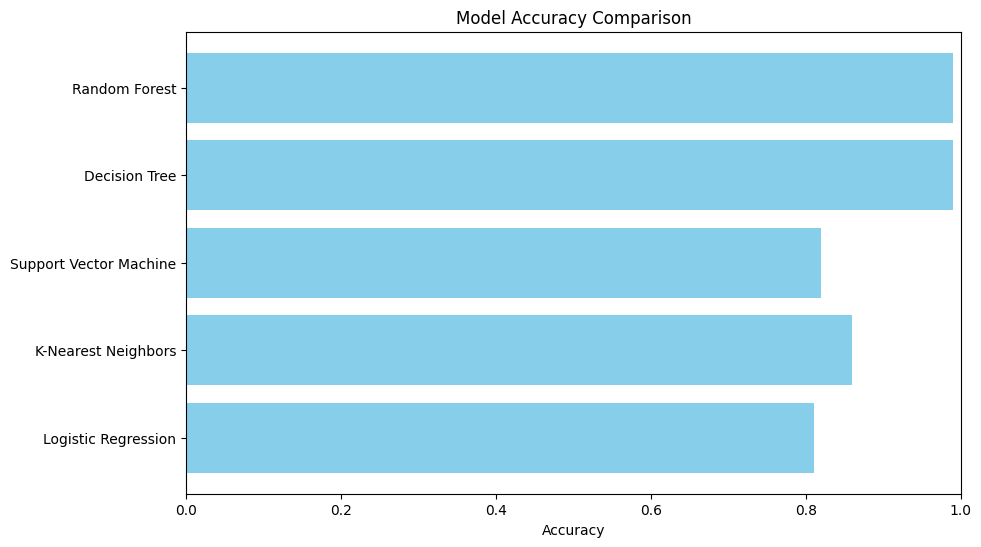

In [84]:
import matplotlib.pyplot as plt

# Example accuracies for different models
accuracies = {
    'Logistic Regression': 0.81,
    'K-Nearest Neighbors': 0.86,
    'Support Vector Machine': 0.82,
    'Decision Tree': 0.99,
    'Random Forest': 0.99
}

# Create a DataFrame for better plotting (optional)
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limit to [0, 1] for better visualization
plt.show()

### Confusion Matrix ( 1 Mark)

Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [86]:
# Train models and calculate confusion matrices


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Storing confusion matrices in separate variables
logistic_conf_matrix = confusion_matrices['Logistic Regression']
knn_conf_matrix = confusion_matrices['K-Nearest Neighbors']
svm_conf_matrix = confusion_matrices['Support Vector Machine']
dt_conf_matrix = confusion_matrices['Decision Tree']
rf_conf_matrix = confusion_matrices['Random Forest']

# Print confusion matrices for each model
print('Confusion Matrix for Logistic Regression:')
print(logistic_conf_matrix)

print('\nConfusion Matrix for K-Nearest Neighbors:')
print(knn_conf_matrix)

print('\nConfusion Matrix for Support Vector Machine:')
print(svm_conf_matrix)

print('\nConfusion Matrix for Decision Tree:')
print(dt_conf_matrix)

print('\nConfusion Matrix for Random Forest:')
print(rf_conf_matrix)

Confusion Matrix for Logistic Regression:
[[77 25]
 [13 90]]

Confusion Matrix for K-Nearest Neighbors:
[[79 23]
 [11 92]]

Confusion Matrix for Support Vector Machine:
[[82 20]
 [11 92]]

Confusion Matrix for Decision Tree:
[[102   0]
 [  3 100]]

Confusion Matrix for Random Forest:
[[102   0]
 [  3 100]]
